# Plot sources that ARA could see

## Jun 17, 2020

In [5]:
import matplotlib.pyplot as plt
import sys
import numpy as np
sys.path.append("/users/PCON0003/cond0068/.local/lib/python3.6/site-packages")
import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
import astropy.coordinates as coord
from astropy.io import ascii
import pandas as pd
import yaml
import itertools
import matplotlib as mpl
import seaborn as sns


In [6]:
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True
mpl.rcParams['mathtext.rm'] = 'Times New Roman'
mpl.rcParams['mathtext.it'] = 'Times New Roman:italic'
mpl.rcParams['mathtext.bf'] = 'Times New Roman:bold'

mpl.rc('font', family='serif', size=12)
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['ytick.major.size'] = 5

mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 18
# mpl.rc('font', size=16)
mpl.rc('axes', titlesize=20)

current_palette = sns.color_palette('colorblind', 10)
import warnings
warnings.filterwarnings("ignore")


Read data and convert to desired coordinates

In [7]:
data = ascii.read("/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/CenA_sourceSearch/analysis_window_clean_altaz_FOV_2018.04.11.csv")

In [8]:
ra = coord.Angle(data['RA']*u.degree)
ra = ra.wrap_at(180*u.degree)
dec = coord.Angle(data['Decl']*u.degree)

In [9]:
galactic_longitudes = np.arange(start=0, stop=360, step=0.1)
galactic_latitudes = [0] * len(galactic_longitudes)
icrs = SkyCoord(galactic_longitudes, galactic_latitudes, unit="deg", frame="galactic").icrs
gal_ra = icrs.ra
gal_ra = gal_ra.wrap_at(180*u.degree)
gal_dec = icrs.dec

In [10]:
gal_center_long = 180.
gal_center_lat = 0.
cena_long = 309.51589568
cena_lat = 19.41727350
icrs2 = SkyCoord(gal_center_long, gal_center_lat, unit="deg", frame="galactic").icrs
gal_center_ra = icrs2.ra
gal_center_ra = gal_center_ra.wrap_at(180*u.degree)
gal_center_dec = icrs2.dec

In [11]:
icrs3 = SkyCoord(cena_long, cena_lat, unit="deg", frame="galactic").icrs
#cena_ra = icrs3.ra
#cena_ra = cena_ra.wrap_at(180*u.degree)
#cena_dec = icrs3.dec
ra_gc=299.3*u.degree
dec_gc=-28.72* u.degree
ra_cena = 201.3625*u.degree
dec_cena = -43.0192*u.degree
c2 = SkyCoord(ra=ra_cena, dec=dec_cena, frame='icrs')
cena_ra = c2.ra.wrap_at(180 * u.deg).radian
cena_dec = c2.dec.radian

### Import other sources to plot

### HAWC catalog

In [12]:
def convertCoord(RA, Dec):
    ra = coord.Angle(RA*u.degree)
    ra = ra.wrap_at(180*u.degree)
    dec = coord.Angle(Dec*u.degree)
    c2 = SkyCoord(ra=ra, dec=dec, frame='icrs')
    ra_rad = c2.ra.wrap_at(180 * u.deg).radian
    dec_rad = c2.dec.radian
    return ra_rad, dec_rad

In [13]:
from yaml import CLoader as Loader, CDumper as Dumper
with open('data/2HWC.yaml', 'r') as f:
    df = pd.json_normalize(yaml.load(f, Loader=Loader))
df.head()

,name,RA,Dec,l,b,position uncertainty,search radius,TS,flux measurements
0,2HWC J0534+220,83.6279,22.0243,184.546552,-5.783169,0.057258,0.0,11015.971849,"[{'tested radius': 0.0, 'flux': 1.84708e-13, '..."
1,2HWC J0631+169,97.9980,16.9968,195.614065,3.506571,0.113815,0.0,29.559120,"[{'tested radius': 0.0, 'flux': 6.7138e-15, 'f..."
2,2HWC J0635+180,98.8330,18.0530,195.036650,4.697305,0.130311,0.0,27.423970,"[{'tested radius': 0.0, 'flux': 6.54401e-15, '..."
3,2HWC J0700+143,105.1170,14.3235,201.102617,8.440166,0.803987,1.0,29.001025,"[{'tested radius': 1.0, 'flux': 1.37969e-14, '..."
4,2HWC J0819+157,124.9800,15.7914,207.996715,26.523943,0.170775,0.5,30.654382,"[{'tested radius': 0.5, 'flux': 1.57892e-15, '..."


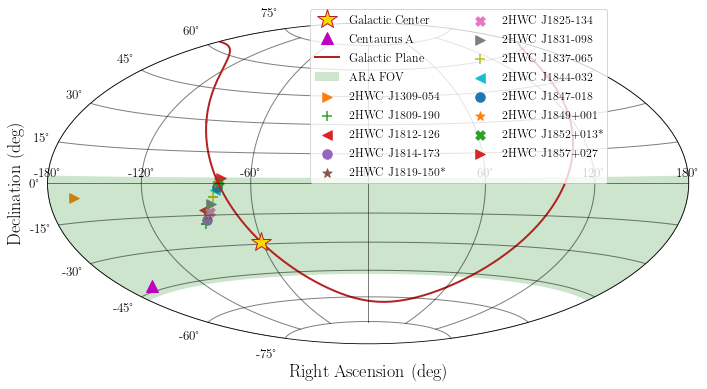

In [18]:
c = SkyCoord(ra=ra_gc, dec=dec_gc, frame='icrs')
fig = plt.figure(figsize=(10,6.5))
ax = fig.add_subplot(111, projection="hammer")
ra_rad = c.ra.wrap_at(180 * u.deg).radian
dec_rad = c.dec.radian
ax.grid(color='k', linestyle='solid', linewidth=0.5)
r = 90
#theta = np.arange(0,2*np.pi,0.1)
x = np.array([-np.pi,np.pi,np.pi,-np.pi,-np.pi])
y2 = np.array([0.05,0.05,-0.82,-0.82,0.05])

plt.fill(x,y2,label='ARA FOV', facecolor='green',alpha=0.2)
plt.plot(ra_rad, dec_rad, '*',color='gold',markersize=20,mec='firebrick',label='Galactic Center')
ax.plot(cena_ra, cena_dec,'^',markersize=12,color='m',label='Centaurus A')
plt.plot(gal_ra.radian[0:2970], -gal_dec.radian[0:2970],color='firebrick',linewidth=2,label='Galactic Plane',zorder=1)
plt.plot(gal_ra.radian[2980:], -gal_dec.radian[2980:],color='firebrick',linewidth=2,zorder=2)
marker = itertools.cycle(('>', '+', '<', 'o', '*', 'X')) 

for index, source in df.iterrows():
#     print(source['RA'], source['Dec'])    
    ra_source, dec_source = convertCoord(source['RA'], source['Dec'])
    if(dec_source>0.05 or dec_source<-0.82): continue
    ax.scatter(ra_source, dec_source,marker=next(marker),s=90, label=source["name"])

legend = ax.legend( )
legend.get_frame().set_facecolor('#ffe4c4')
plt.legend(ncol=2,loc=(0.41,0.5))
ax.set_ylabel('Declination (deg)') #give it a title
ax.set_xlabel('Right Ascension (deg)',labelpad=20) #give it a title
ax.tick_params(direction='out', length=8, width=4, colors='k',
               grid_color='k', grid_alpha=0.5, labelsize=13, grid_linewidth=1)
ax.axes.get_xaxis().set_ticks([-np.pi/3, -2*np.pi/3, -np.pi,0,np.pi/3, 2*np.pi/3, np.pi])
# plt.gca().set_aspect('0.9', adjustable='box')
# plt.suptitle("2HWC Survey (sources within ARA's FOV)",fontsize=20)
plt.tight_layout()
# plt.savefig("./plots/ARA_sources_HAWC.pdf")

### UHECR catalog

In [15]:
UHECR = pd.read_csv("data/UHECR_catalog.csv")
UHECR.head()

,Name,RA,DEC,P1/Jy,d/Mpc,type
0,3C 31,16.85,32.41,7.0,74,FR-I
1,3C 40,21.50,-1.34,8.0,77,FR-I
2,3C 66B,35.79,42.99,12.0,92,FR-I
3,PKS 0238-084,40.27,-8.26,0.5,21,BLU
4,3C 83.1,49.57,41.85,10.0,109,FR-I


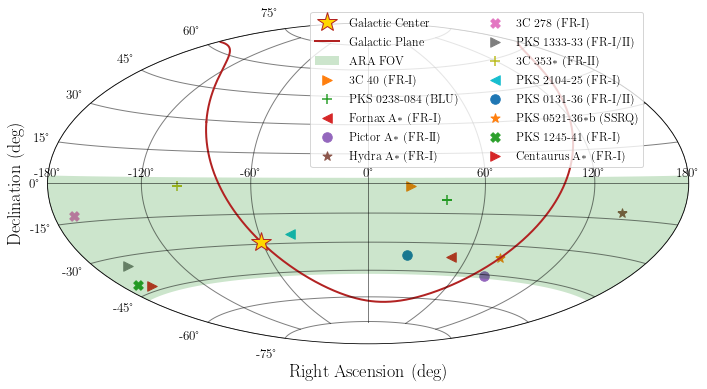

In [19]:
c = SkyCoord(ra=ra_gc, dec=dec_gc, frame='icrs')
fig = plt.figure(figsize=(10,6.5))
ax = fig.add_subplot(111, projection="hammer")
ra_rad = c.ra.wrap_at(180 * u.deg).radian
dec_rad = c.dec.radian
ax.grid(color='k', linestyle='solid', linewidth=0.5)
r = 90
#theta = np.arange(0,2*np.pi,0.1)
x = np.array([-np.pi,np.pi,np.pi,-np.pi,-np.pi])
y2 = np.array([0.05,0.05,-0.82,-0.82,0.05])

plt.fill(x,y2,label='ARA FOV', facecolor='green',alpha=0.2)
plt.plot(ra_rad, dec_rad, '*',color='gold',markersize=20,mec='firebrick',label='Galactic Center')
# ax.plot(cena_ra, cena_dec,'^',markersize=12,color='m',label='Centaurus A')
plt.plot(gal_ra.radian[0:2970], -gal_dec.radian[0:2970],color='firebrick',linewidth=2,label='Galactic Plane',zorder=1)
plt.plot(gal_ra.radian[2980:], -gal_dec.radian[2980:],color='firebrick',linewidth=2,zorder=2)
marker = itertools.cycle(('>', '+', '<', 'o', '*', 'X')) 

for index, source in UHECR.iterrows():
#     print(source['RA'], source['Dec'])    
    ra_source, dec_source = convertCoord(source['RA'], source['DEC'])
    if(dec_source>0.05 or dec_source<-0.82): continue
    ax.scatter(ra_source, dec_source,marker=next(marker),s=90, label="%s (%s)"%(source["Name"], source["type"]))

legend = ax.legend()
legend.get_frame().set_facecolor('#ffe4c4')
plt.legend(ncol=2,loc=(0.41,0.55))
ax.set_ylabel('Declination (deg)') #give it a title
ax.set_xlabel('Right Ascension (deg)',labelpad=20) #give it a title
ax.tick_params(direction='out', length=8, width=4, colors='k',
               grid_color='k', grid_alpha=0.5, labelsize=13, grid_linewidth=1)
ax.axes.get_xaxis().set_ticks([-np.pi/3, -2*np.pi/3, -np.pi,0,np.pi/3, 2*np.pi/3, np.pi])
# plt.gca().set_aspect('0.9', adjustable='box')
# plt.suptitle("Radio galaxies as UHECR sources \n Rachen & Eichmann",fontsize=20)
plt.tight_layout()
plt.savefig("./plots/ARA_sources_UHECR.pdf")